In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import time


In [84]:
df = pd.read_csv("Country-data.csv")

In [85]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [86]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [87]:
X = df[['income', 'inflation', 'gdpp']]

In [88]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# For K=2

In [89]:
kmeans = KMeans(n_clusters=2)

In [90]:
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [91]:
y_kmeans = kmeans.predict(X_scaled)

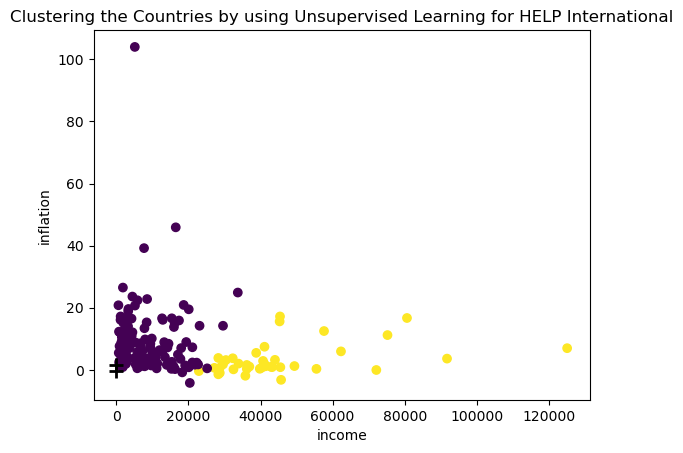

In [92]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans)
plt.xlabel('income')
plt.ylabel('inflation')
plt.title('Clustering the Countries by using Unsupervised Learning for HELP International')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], marker='+', s=100, linewidths=2, color='black')
plt.show()

# Accuracy

Text(0, 0.5, 'SW')

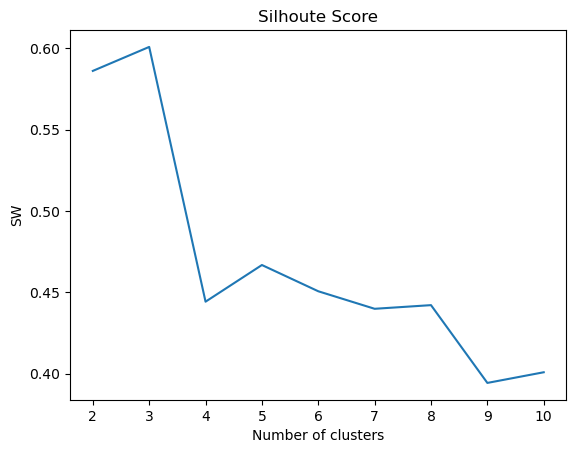

In [93]:
sw = []
for i in range(2, 11):
    kMeans = KMeans(n_clusters = i, random_state = 0)
    kMeans.fit(X_scaled)
    y_kmean = kMeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, y_kmean)
    sw.append(silhouette_avg)
plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')

# Performance

In [94]:
from timeit import default_timer
start = default_timer()
duration = default_timer() - start
print(duration)

2.970000059576705e-05


# Resource efficiency

In [95]:
Time = df.iloc[:, 1:].values

In [96]:
k = 3
max_iter = 100

In [97]:
start_time = time.time()
kmeans = KMeans(n_clusters=k, max_iter=max_iter).fit(X)
end_time = time.time()

In [98]:
print("Execution time: %.3f seconds" % (end_time - start_time))

Execution time: 0.053 seconds
